In [212]:
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from glob import glob
from playsound import playsound
from IPython.display import Audio

In [213]:
# y, sr = librosa.load(librosa.ex('trumpet'))
#
# Audio(data=y, rate=sr)

In [214]:
# trumpet_onsets = librosa.onset.onset_detect(y=y, sr=sr, units='time')
# trumpet_onsets

In [215]:
# librosa.display.waveshow(y=y, sr=sr)

In [216]:
# o_env = librosa.onset.onset_strength(y=y, sr=sr)
# times = librosa.times_like(o_env, sr=sr)
# onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
# print(onset_frames)
# D = np.abs(librosa.stft(y))
# fig, ax = plt.subplots(nrows=2, sharex=True)
# librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
#                          x_axis='time', y_axis='log', ax=ax[0])
# ax[0].set(title='Power spectrogram')
# ax[0].label_outer()
# ax[1].plot(times, o_env, label='Onset strength')
# ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
#              linestyle='--', label='Onsets')
# ax[1].legend()

In [217]:
audio_files = glob('Audio/*')
# print(audio_files)
audio_path = audio_files[8]
y, sr = librosa.load(audio_path)  # y - raw data of audio file, sr - sample rate of audio file
audio_name = audio_path[6:]
print(f'Row data of audio file: {audio_name}')
print(f'Sample rate (numer of samples in 1s): {sr}')
print(f'Shape of audio data: {y.shape}')

Row data of audio file: Piano C.wav
Sample rate (numer of samples in 1s): 22050
Shape of audio data: (33968,)


In [218]:
Audio(data=y, rate=sr)

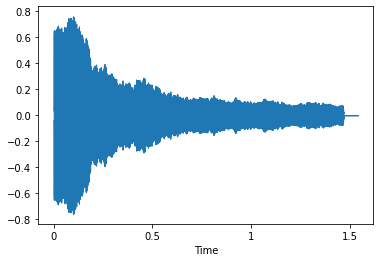

In [219]:
librosa.display.waveshow(y=y, sr=sr)

In [220]:
librosa.onset.onset_detect(y=y, sr=sr, units='time')

array([0.11609977, 0.23219955, 0.60371882, 0.74303855, 0.83591837,
       1.021678  , 1.18421769, 1.27709751, 1.4860771 ])

[ 5 10 26 32 36 44 51 55 64]


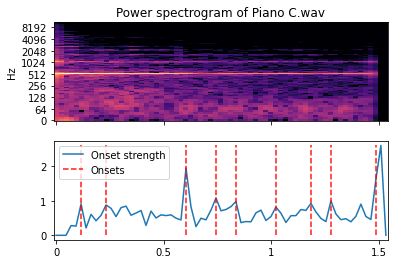

In [221]:
o_env = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
print(onset_frames)
D = np.abs(librosa.stft(y))
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title=f'Power spectrogram of {audio_name}')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
             linestyle='--', label='Onsets')
ax[1].legend()

In [222]:
def calc_cepstrum(data):
    """
    Calculates the complex cepstrum of a real sequence.
    """
    spectrum = np.fft.fft(data)
    log_spectrum = np.log(np.abs(spectrum))
    cepstrum = np.fft.ifft(log_spectrum).real
    return cepstrum


In [223]:
SAMPLE_RATE = sr
FREQUENCY_RANGE = (400, 1200)


def find_fundamental_freq(samples):
    cepstrum = calc_cepstrum(samples)
    # search for maximum between 0.08ms (=1200Hz) and 2ms (=500Hz)
    # as it's about the recorder's frequency range of one octave
    min_freq, max_freq = FREQUENCY_RANGE
    start = int(SAMPLE_RATE / max_freq)
    end = int(SAMPLE_RATE / min_freq)
    narrowed_cepstrum = cepstrum[start:end]

    peak_ix = narrowed_cepstrum.argmax()
    freq0 = SAMPLE_RATE / (start + peak_ix)

    if freq0 < min_freq or freq0 > max_freq:
        # Ignore the note out of the desired frequency range
        return

    return freq0
